# 1 -  Análise da variação do custo dos insumos da construção civil do período de 2007 até 2021

## 1.1 -  Introdução

* Este mini-projeto visa demonstrar apenas a variação do custo de alguns insumos da construção civil ao longo dos meses tendo com base o banco de dados do 
[CBIC](http://www.cbicdados.com.br/home/) ;
* O foco deste trabalho é trabalhar com algumas funcionalidades da biblioteca pandas e construção de uma metologia para obtenção dos dados na planilha utilizada;
* Por isso, as conclusões e tratamentos de dados serão superficiais, pois o foco é a elaboração de um código no qual possa realizar a extração dos dados da planilha;
* O resultados deste trabalho só podem ser replicado com a devida referência;
* Para mais informações sobre o dataset e replicação: kitawarairon@gmail.com;
* Não haverá predição, pois o dataset informa apenas o custo variando ao longo dos anos;
* Em cada tópico a partir da análise temporal, gerou-se algumas perguntas e insights;

## 1.2 -  Informações sobre o dataset 
*  Os dados utilizados demonstram os custos dos materiais por mês do período entre 2007 até 2021;
> **Abaixo está um resumo sobre alguns materiais utilizados**:<br>
>  O custo do aço está relacionado ao $kg$ da barra de aço $CA-50$ com $\phi = 10 \ mm$ de diâmetro;<br>
>  O custo do concreto está relacionado ao $m^{3}$ de $f_{ck} = 25 \ MPa$;<br>
> Para maiores informações acesse o dataset;


## 1.3 -  Metodologia de análise
* Foi-se utilizada a biblioteca `pandas` para analisar e filtrar os dados;
* O projeto iniciou-se com a separação de cada insumo em seu DataFrame específico;
* No início da análise oconteceu com a média do Brasil de alguns insumos individuais e, posteriormente, agrupados;
* Por fim, foi-se realizada uma separação entre as regiões do Brasil para os insumos de aço e concreto;

# 2 -  Importando módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3 -  Criando lista dos DataFrames

* Criando lista auxiliares

In [2]:
insumos_list = ['stell_df', 'concrete_df']

In [3]:
lines_list = ['stell_line', 'concrete_line']

* Criando os DataFrames

In [4]:
# ---
# materiais
# ---
stell_df = pd.DataFrame()                                               # DataFrame do aço
concrete_df = pd.DataFrame()                                            # DataFrame do concreto

* Criando um dicionário para relacionar o índice com o insumo

In [5]:
index_df = [6,7,8]
dic_df = dict(zip(insumos_list,index_df))

# 4 -  Executando o programa para coletar os dados em todas as sheets

In [6]:
first_sheet = 169 # a primeira medição encontra-se na sheet 169

for i in range(169):
    
    # abrindo os arquivos
    custos_df = pd.read_excel('tab_06.A.12_4.xlsx', sheet_name = first_sheet)
    
    # criando a lista
    lista = list(custos_df.columns)
    
    # filtrando as colunas
    if 'Unnamed: 25' in lista:
        custos_df.drop('Unnamed: 25', axis = 1, inplace=True)

    if 'Unnamed: 24' in lista:
        custos_df.drop('Unnamed: 24', axis = 1, inplace=True)

    if 'Unnamed: 23' in lista:
        custos_df.drop('Unnamed: 23', axis = 1 , inplace=True)
        
    # renomeando as colunas    
    custos_df.columns = custos_df.iloc[3]
    
    # removendo colunas inúteis
    colunas_remover = ['LOTE BÁSICO', 'UN',]
    custos_df.drop(colunas_remover, axis = 1, inplace = True)
    
    # localizando index do aço e do concreto
    stell_line = custos_df.iloc[dic_df['stell_df']]
    concrete_line = custos_df.iloc[dic_df['concrete_df']]
    
    # adicionando ao novo DataFrame
    stell_df = stell_df.append(stell_line)
    concrete_df = concrete_df.append(concrete_line)

    # contagem
    first_sheet -= 1

# 5 - Analisando os novos DataFrames

* Criando copias dos DataFrames

In [34]:
stell_df_copy = stell_df.copy()
concrete_df_copy = concrete_df.copy()

* Criando a array dos indices

> Cria-se uma objeto que contém o período de fevereiro de 2007 até março de 2021;

In [27]:
time = pd.date_range(start = '02-2007', end = '03-2021', freq = '1M')

* Removendo algumas colunas

In [35]:
stell_df_copy.drop(['DF**'], axis = 1, inplace=True)
concrete_df_copy.drop(['DF**'], axis = 1, inplace=True)

* Ajustando as colunas com NaN com o split do DataFrame

In [36]:
concrete_mean_df = concrete_df_copy.loc[ : , 'AL':'SP']
stell_mean_df = stell_df_copy.loc[:, 'AL':'SP']

* Coletando informações sobre os DataFrames e verificando a integridade dos dados;

Com o método .info()

> **concrete_df** - as series DF e SP são objetos e na serie DF tem um objeto nulo; <br>
> **stell_df** - a serie DF é objeto e tem um objeto nulo; <br>
> **cimento_df** - as series estão OK, mas tem um valor nulo;

Assim, o concrete_df e stell_df serão tratados.


## 5.1 -  Ajustando os DataFrames

* Concrete

In [65]:
concrete_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 8 to 8
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AL      169 non-null    float64
 1   AM      169 non-null    float64
 2   BA      169 non-null    float64
 3   CE      169 non-null    float64
 4   DF      168 non-null    object 
 5   ES      169 non-null    float64
 6   GO      169 non-null    float64
 7   MA      169 non-null    float64
 8   MG      169 non-null    float64
 9   MS      169 non-null    float64
 10  MT      169 non-null    float64
 11  PA      169 non-null    float64
 12  PB      169 non-null    float64
 13  PE      169 non-null    float64
 14  PR      169 non-null    float64
 15  RJ      169 non-null    float64
 16  RO      169 non-null    float64
 17  RS      169 non-null    float64
 18  SC      169 non-null    float64
 19  SE      169 non-null    float64
 20  SP      169 non-null    object 
dtypes: float64(19), object(2)
memory usage: 2

* Analisando e ajustando as colunas: <font color=red> DF </font> e <font color=red> SP  </font> 

> DF - Encontra-se com um dado faltante e a coluna encontra-se como tipo objeto;

> SP - Enontra-se como o tipo objeto, portanto, nesta Series deve conter strings fora do padrão;

In [37]:
concrete_mean_df.drop(['DF'], axis=1, inplace=True)
concrete_mean_df.drop(['SP'], axis=1, inplace=True)

* Criando a coluna da média e excluindo as colunas NaN

In [38]:
concrete_df_copy['Média Brasil'] = concrete_mean_df.mean(axis=1)
stell_df_copy['Média Brasil'] = stell_mean_df.mean(axis=1)

* **Ajustando os indices**

> 0 -> referente a fevereiro de 2007

> 168 -> referente a março de 2021

> passo de 1

* Atualizando o índice dos DataFrames

In [39]:
stell_df_copy.index = time
concrete_df_copy.index = time

#  6 - Análise do custo ao longo dos meses para cada material

* Definindo algumas funções:

In [40]:
def plot_price(data,cor,mat):
    # ---
    # lista auxiliares
    # ---
    mcu = ['concreto']                             # custo referente ao metro cúbico (m³)
    mpe = ['aço']                                  # custo referente ao peso (kg)
    
        
    if mat.lower() in mcu:
        if mat.lower == 'concreto':
            titulo = f'Variação do preço do metro cúbico do {mat}'
        else:
            titulo = f'Variação do preço do metro cúbico da {mat}'
            
    elif mat.lower() in mpe:
        if mat.lower() == 'aço':
            titulo = f'Variação do preço do kg do {mat}'
        else:
            titulo = f'Variação do preço do kg da {mat}'

        
    plot = data.plot(color = cor,
                     figsize=(15,5),
                     grid=True,
                     xlabel = 'Tempo (meses)',
                     ylabel = 'Custo (R$)',
                     legend = True,
                     title = titulo, label = f'Média do {mat}' )
    return plot


def plot_price_normatizado(data,cor,mat):
    # ---
    # normatizando
    # ---
    data_first = data/data.iloc[0]
    # ---
    # lista auxiliares
    # ---
    mcu = ['concreto']                             # custo referente ao metro cúbico (m³)
    mpe = ['aço']                                  # custo referente ao peso (kg)
        
    if mat.lower() in mcu:
        if mat.lower == 'concreto':
            titulo = f'Variação do preço do metro cúbico do {mat}'
        else:
            titulo = f'Variação do preço do metro cúbico da {mat}'
            
    elif mat.lower() in mpe:
        if mat.lower() == 'aço':
            titulo = f'Variação do preço do kg do {mat}'
        else:
            titulo = f'Variação do preço do kg da {mat}'
                
    # ---
    # configurações de plotagem
    # ---
    plot = data_first.plot(color = cor,
                           figsize=(15,5),
                           grid=True, xlabel = 'Tempo (meses)',
                           ylabel = 'Custo normatizado',
                           legend = True,
                           title = titulo, label = f'Média do {mat}' )
    return plot

* **Análise do aço**:

> O aço ao longo do período analisado apresentou alguns períodos de crescimento expodencial, isto é, entre 2008-2010 e 2020-2021;

> A varição do custo do kg do aço em relação à primeira medição mostrou um aumento de 250%;

> PERGUNTA: O que aconteceu nesses períodos para o crescimento expodencial ?


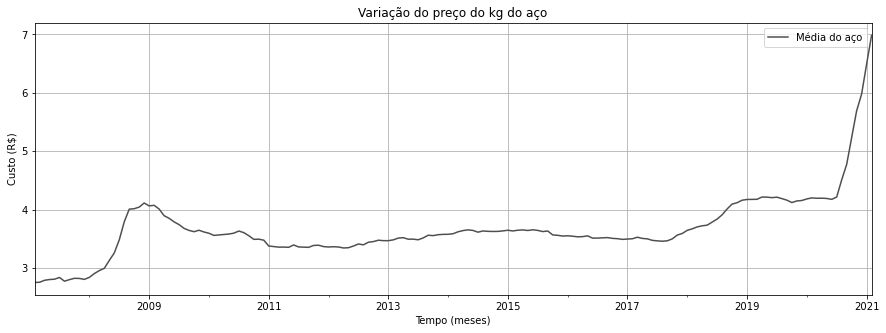

In [41]:
plot_price(stell_df_copy['Média Brasil'],'#4F4F4F','aço')
plt.show()

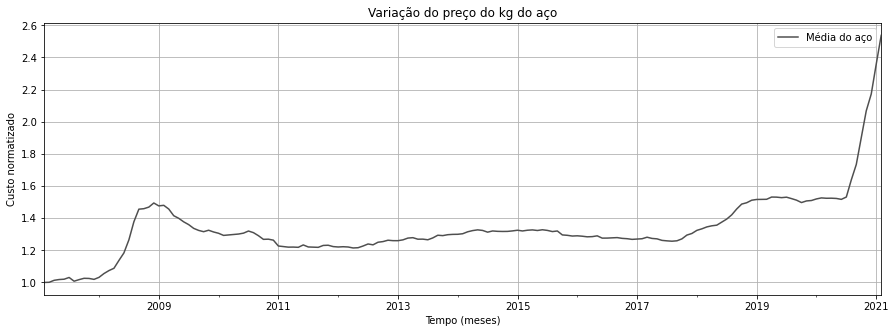

In [42]:
plot_price_normatizado(stell_df_copy['Média Brasil'],'#4F4F4F','aço')
plt.show()

* **Análise do concreto**:

> O concreto apresentou um crescimento mais constante;

> A varição do custo do metro cúbico do concreto em relação à primeira medição mostrou um aumento de 170%;

> Em meados 2008-2010 e de 2021-2021 o concreto obteve um aumento no seu custo muito maior do que foi observado no período;

> PERGUNTA: O que aconteceu nesse período para o crescimento expodencial ?


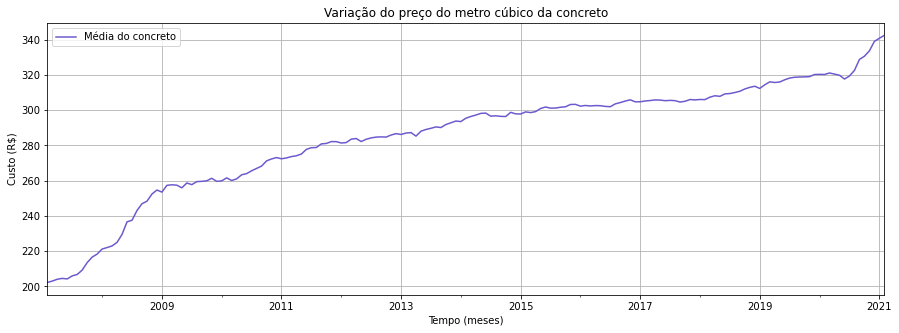

In [43]:
plot_price(concrete_df_copy['Média Brasil'],'#6A5ACD','concreto')
plt.show()

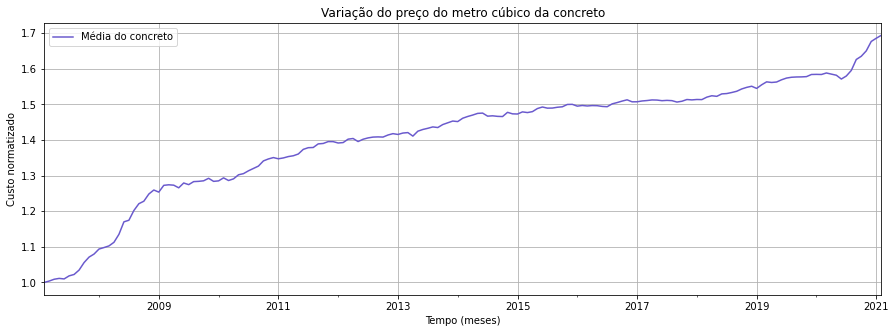

In [44]:
plot_price_normatizado(concrete_df_copy['Média Brasil'],'#6A5ACD','concreto')
plt.show()

* **Analisando o aço e concreto**

<ipython-input-47-d6760a7ac415>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


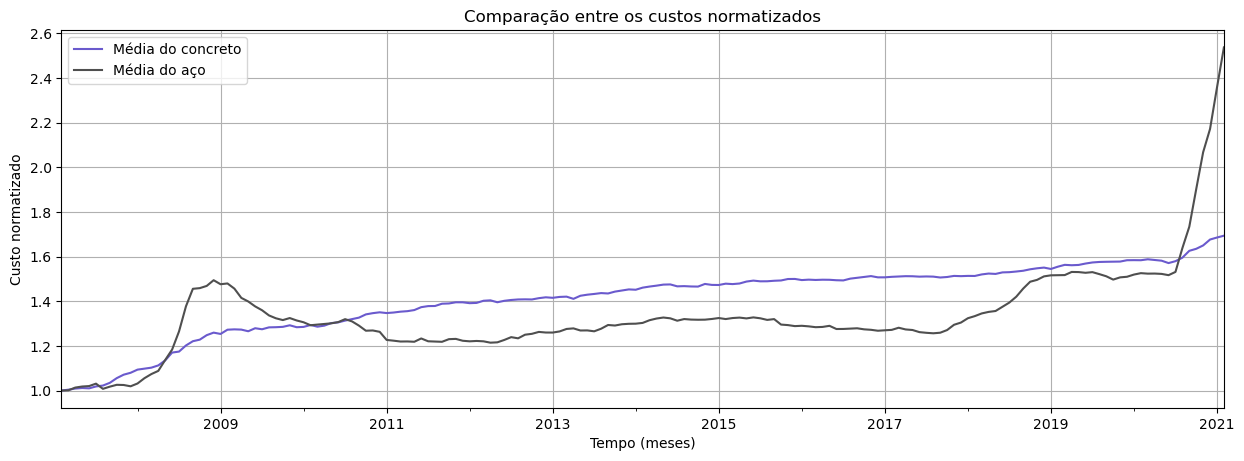

In [47]:
# criando o ambiente da figura
plt.figure(dpi=100)

# gráfico do concreto
plt.subplot()
plot_price_normatizado(concrete_df_copy['Média Brasil'],'#6A5ACD','concreto')

# gráfico do aço
plt.subplot()
plot_price_normatizado(stell_df_copy['Média Brasil'],'#4F4F4F','aço')

plt.title('Comparação entre os custos normatizados')

# ajuste da localização da legenda
plt.legend(loc = 'upper left')
plt.show()

#  7. Análise do aço e concreto por região

* Criando um dicionário das regiões disponíveis

In [48]:
regioes = {
           'nordeste':['AL','BA','CE','MA ','PB','SE','PE '],
           'norte':['AM ','RO','PA'], 
           'centro_oeste':['DF','GO','MS','MT'],
           'suldeste':['SP','RJ','ES','MG'],
           'sul':['RS','PR','SC'],
          }

* Definindo algumas funções 

In [49]:
def regiao_df(data,dic,regiao = 'região'):
    '''
    A função regiao_df filtra o DataFrame em um da região escolhida
    '''
    data_regiao = data[dic[regiao]]
    return data_regiao


def mean_region(data, regiao = 'regiao', inf='inf', sup='sup'):
    data_mean = data.loc[:, inf:sup]
    data[regiao] = data_mean.mean(axis=1)
    return data[regiao]


def plot_region(data):
    return data.plot(figsize=(15,5),grid=True)


def plot_region_first(data):
    data_first = data/data.iloc[0]    
    return data_first.plot(figsize=(15,5),grid=True)


def plot_region_mean(data,regiao='regiao'):
    data_mean = data/data.iloc[0][regiao]
    return data_mean.plot(figsize=(15,5),grid=True)

* Criando os DataFrame de cada região

In [50]:
concrete_nordeste_df = regiao_df(concrete_df_copy,regioes,'nordeste')
concrete_norte_df = regiao_df(concrete_df_copy,regioes,'norte')
concrete_suldeste_df = regiao_df(concrete_df_copy,regioes,'suldeste')
concrete_sul_df = regiao_df(concrete_df_copy,regioes,'sul')
concrete_centro_df = regiao_df(concrete_df_copy,regioes,'centro_oeste')

In [51]:
stell_nordeste_df = regiao_df(stell_df_copy,regioes,'nordeste')
stell_norte_df = regiao_df(stell_df_copy,regioes,'norte')
stell_suldeste_df = regiao_df(stell_df_copy,regioes,'suldeste')
stell_sul_df = regiao_df(stell_df_copy,regioes,'sul')
stell_centro_df = regiao_df(stell_df_copy,regioes,'centro_oeste')

##  7.1 - Análise da região para o concreto

###  7.1.1 - Região Nordeste

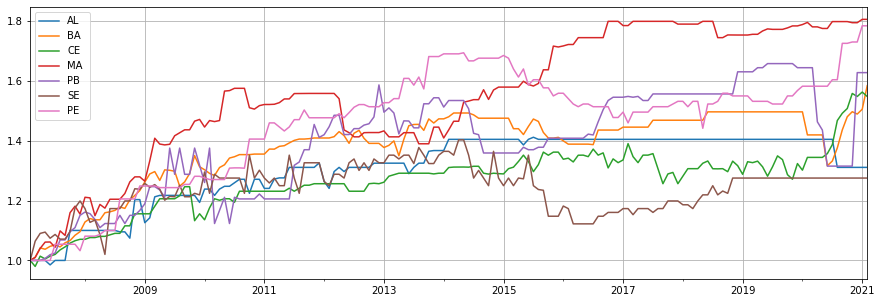

In [59]:
plot_region_first(concrete_nordeste_df)
plt.show()

### 7.1.2 - Região Norte

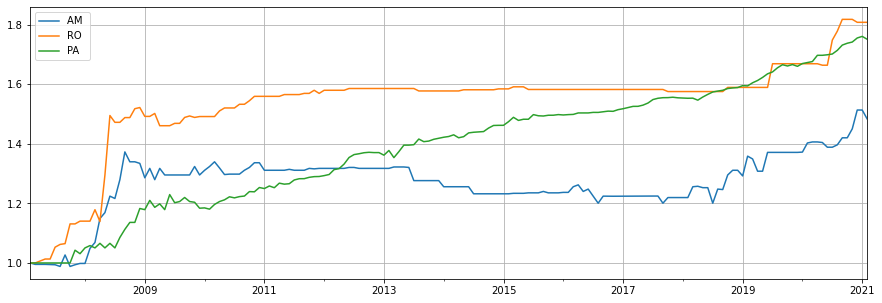

In [60]:
plot_region_first(concrete_norte_df)
plt.show()

### 7.1.3 - Região Suldeste

In [67]:
concrete_suldeste_df.drop(['SP'], axis=1, inplace=True)

C:\Users\kitaw\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


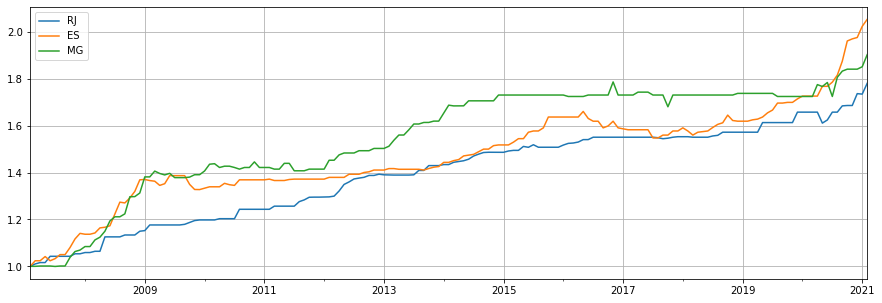

In [68]:
plot_region_first(concrete_suldeste_df)
plt.show()

### 7.1.4 - Região Sul

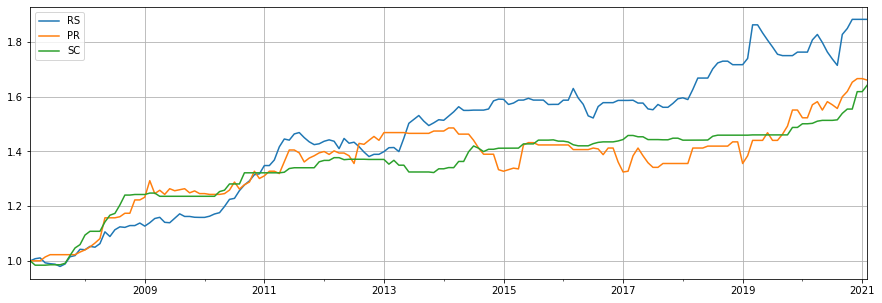

In [63]:
plot_region_first(concrete_sul_df)
plt.show()

### 7.1.5 - Região Centro-Oeste

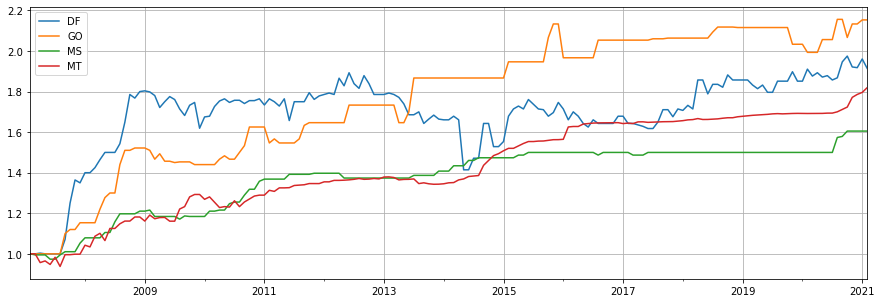

In [61]:
concrete_centro_df.fillna(method='backfill', inplace=True)
plot_region_first(concrete_centro_df)
plt.show()

## 7.2 - Análise da região do aço

### 7.2.1 - Região nordeste

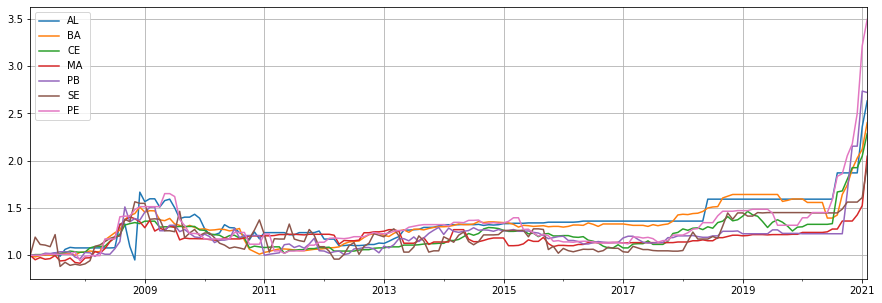

In [69]:
plot_region_first(stell_nordeste_df)
plt.show()

### 7.2.2 - Região norte

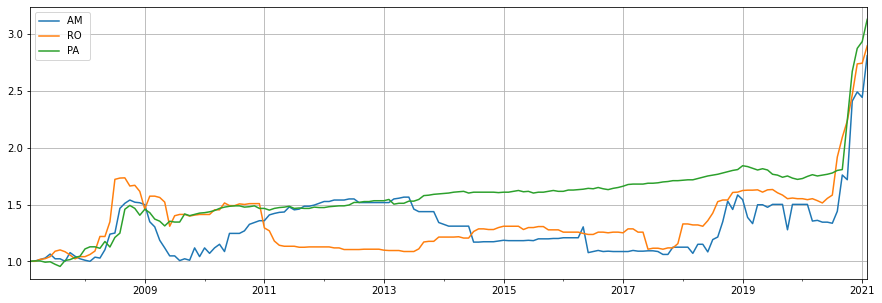

In [70]:
plot_region_first(stell_norte_df)
plt.show()

### 7.2.3 - Região suldeste

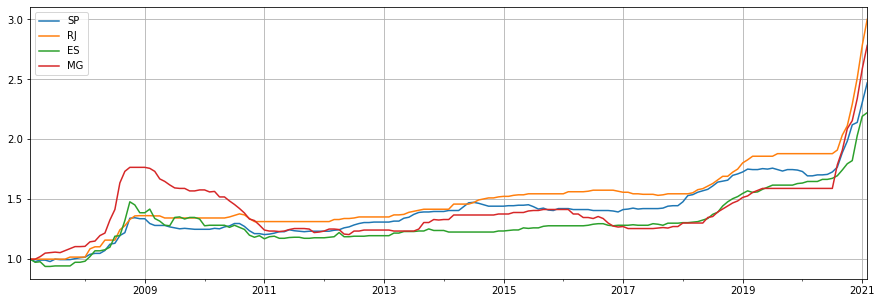

In [71]:
plot_region_first(stell_suldeste_df)
plt.show()

### 7.2.4 - Região sul

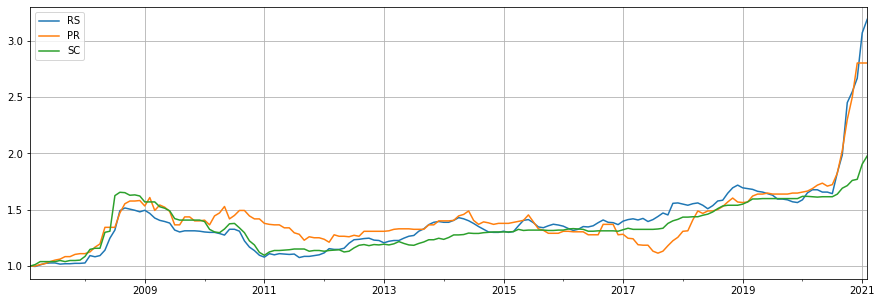

In [73]:
plot_region_first(stell_sul_df)
plt.show()

### 7.2.5 - Região centro-oeste

C:\Users\kitaw\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


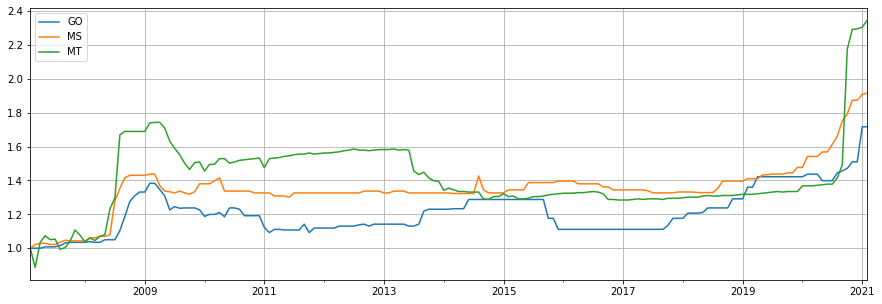

In [75]:
stell_centro_df.drop(['DF'], axis=1, inplace=True)
plot_region_first(stell_centro_df)
plt.show()

* Criando a média em cada DataFrame

In [ ]:
mean_region(concrete_nordeste_df,'nordeste','AL','PE ')
mean_region(concrete_norte_df,'norte','AM ','PA')
mean_region(concrete_suldeste_df,'suldeste','SP','MG')
mean_region(concrete_sul_df,'sul','RS','SC')
mean_region(concrete_centro_df,'centro_oeste','DF','MT')

### 8. Conclusões

> **`Concreto`** <br>
> O concreto obteve um aumento mais __"linear"__ em comparação ao do aço, isto é, não teve um aumento abrupto ao longo dos últimos anos; <br>
> Entre 2007 e 2009, o concreto obteve um aumento devidos aos incentivos do governo PAC e Minha Casa, Minha vida; <br>
> No final 2020, o concreto demonstra uma variação mais significativa, __devido a pandemia ???__;<br>
> Em relação ao valor inicial, o concreto, obteve um aumento aproximado de __170%__;

> **`Aço`** <br>
> O aço demonstrou ser muito mais sensível à economia em comparação ao concreto; <br>
> Entre 2007 e 2009, o aço obteve um aumento devidos aos incentivos do governo PAC e Minha Casa, Minha vida; <br>
> No final 2020, o aço demonstra uma variação no custo extrema, __devido a pandemia ???__;<br>
> Em relação ao valor inicial, o aço, obteve um aumento aproximado de __250%__; <br>


# 8. Apêndice

* Calculando o número de sheets

fev - 2007
mar - 2021

* 14 anos + 1 mes

* total de planilhas

# <font color=green> 9. Links </font>

* [link 1 ](https://veja.abril.com.br/economia/em-2009-programas-de-governo-puxaram-avanco-da-construcao-civil/)
* [link 2](https://static.portaldaindustria.com.br/media/filer_public/58/c1/58c1e0ee-6d28-4a84-8caa-6ccb88bbf775/sondagemindustriadaconstrucao_agosto2021.pdf)